  ## Exploratory Data Analysis and Test of significance
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Input file
Here we have the input file as .csv which we are reading using Pandas. Further it is converted into Data Frame for better manupulation. 
By calling df.info we can see the information of our Data frame. It describes the information about each column substantiating total number of data enteries, also describing that all the values are not Null values. 

In [548]:
df= pd.DataFrame(pd.read_csv("wind.csv"))


In [549]:
#Identifying null and non- null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
Yr     6574 non-null int64
Mo     6574 non-null int64
Dy     6574 non-null int64
RPT    6568 non-null float64
VAL    6571 non-null float64
ROS    6572 non-null float64
KIL    6569 non-null float64
SHA    6572 non-null float64
BIR    6574 non-null float64
DUB    6571 non-null float64
CLA    6572 non-null float64
MUL    6571 non-null float64
CLO    6573 non-null float64
BEL    6574 non-null float64
MAL    6570 non-null float64
dtypes: float64(12), int64(3)
memory usage: 770.5 KB


Now we are analyzing each column and below displaying True value for the columns with NaN value and False for columns with no NaN values

In [550]:
df.isnull().any()

Yr     False
Mo     False
Dy     False
RPT     True
VAL     True
ROS     True
KIL     True
SHA     True
BIR    False
DUB     True
CLA     True
MUL     True
CLO     True
BEL    False
MAL     True
dtype: bool

Now we are calculating total number of NaN values for each column

In [551]:
df.isnull().sum()

Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

## Handling Missing Values
There are multiple ways to handle missing data.One of the methods is Data Imputation. For our analyses we are performing imputations by replacing NaN values with column Mean
We are further verifying the same by calculating NaN values for each column.

In [552]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Yr     0
Mo     0
Dy     0
RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

## Data Analysis. 
Calculate min, max, mean, and standard deviation for Dublin (DUB) in Ireland.

Analysis:
For the above question we are required to analyize min , max and sd for column DUB. 
We have calculated the above metrices in two ways: 

* we are calling pandas library functions for min, max , mean and standard deviation.
* We have also shown the calculation for mean and sd without using library functions.

In [553]:
mean = 0
sd = 0
#x= df["RPT"].loc(df['Yr']== 61)
dub = df["DUB"]

In [554]:
# Mean and standard deviation without library functions
for i in dub:
    mean = mean+i

mean = mean/(len(dub))

for j in dub:
    sd = sd + np.square(j-mean)
sd = np.sqrt(sd/(len(dub)))

print('\033[1m' +"Mean value for Dublin(DUB) without using library functions is", mean)
print('\033[1m' +"Standard Deviation for Dublin(DUB) without using library functions is", sd)

Mean value for Dublin(DUB) without using library functions is 9.797342870187183
Standard Deviation for Dublin(DUB) without using library functions is 4.976040061048188


In [555]:
# Calculation of min , max, mean , standard deviation using pandas library functions
mean = dub.mean()
minimum = dub.min()
maximum = dub.max()
std = dub.std()
print('\033[1m' +"Min value for Dublin(DUB) is", minimum)
print('\033[1m' +"Mean value for Dublin(DUB) is", mean)
print('\033[1m' +"Maximum value for Dublin(DUB) is",maximum)
print('\033[1m' +"Standard Deviation value for Dublin(DUB)",std)




Min value for Dublin(DUB) is 0.0
Mean value for Dublin(DUB) is 9.797342870187183
Maximum value for Dublin(DUB) is 30.37
Standard Deviation value for Dublin(DUB) 4.976418567880291


## Calculatinf Percentile
What is the 75 percentile of ROS.?

Analysis: For the above question we are  finding 75th percentile for column ROS, and also verifying the same by ploting boxplot for ROS column.
We have calculated 75 th percentile to be 14.6 , which can also be substatiated from the boxplot.

ROS 75th percentile is  14.67


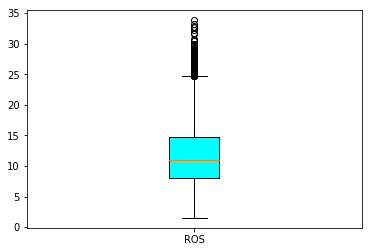

In [556]:
ros_Column = df["ROS"]
box= plt.boxplot(ros_Column,patch_artist=True,labels=["ROS"])
colors = ['cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()
print('\033[1m' + "ROS 75th percentile is ",ros_Column.quantile(0.75))

## Analysing Wind Speeds
Calculate the min, max, mean wind speeds and standard deviations for January in the dataset.?

Analysis: Here we have to find min, max , mean and std for month January only. Thus our focus is on the data rows for month january i.e Mo = 1.
We are fetching only those data elements from our data frame and then performing necessary calculations.

In [557]:
df1=df.loc[df['Mo'] == 1]
df1

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.040000,14.960000,13.17,9.29,10.455834,9.87,13.67,10.250000,10.83,12.58,18.50,15.04
1,61,1,2,14.710000,10.644314,10.83,6.50,12.620000,7.67,11.50,10.040000,9.79,9.67,17.54,13.83
2,61,1,3,18.500000,16.880000,12.33,10.13,11.170000,6.17,11.25,8.495053,8.50,7.67,12.75,12.71
3,61,1,4,10.580000,6.630000,11.75,4.58,4.540000,2.88,8.63,1.790000,5.83,5.88,5.46,10.88
4,61,1,5,13.330000,13.250000,11.42,6.17,10.710000,8.21,11.92,6.540000,10.92,10.34,12.92,11.83
5,61,1,6,13.210000,8.120000,9.96,6.67,5.370000,4.50,10.67,4.420000,7.17,7.50,8.12,13.17
6,61,1,7,13.500000,14.290000,9.50,4.96,12.290000,8.33,9.17,9.290000,7.58,7.96,13.96,13.79
7,61,1,8,10.960000,9.750000,7.62,5.91,9.620000,7.29,14.29,7.620000,9.25,10.46,16.62,16.46
8,61,1,9,12.580000,10.830000,10.00,4.75,10.370000,6.79,8.04,10.130000,7.79,9.08,13.04,15.37
9,61,1,10,13.370000,11.120000,19.50,8.33,9.710000,6.54,11.42,7.790000,8.54,9.00,8.58,11.83


Now for our further analysis and calculations we are not considering columns for year, month, day as our major data elements are wind speeds for 12 different countries and we are intersted in knowing min , max, mean and std of wind speeds for month of january. Thus we are neglecting first three columns for our calculations.

In [558]:
mean1 = df1[["RPT", "VAL","ROS","KIL", "SHA", "BIR", "DUB","CLA","MUL","CLO","BEL","MAL"]].mean()
minimum1 = df1[["RPT", "VAL","ROS","KIL", "SHA", "BIR", "DUB","CLA","MUL","CLO","BEL","MAL"]].min()
maximum1 = df1[["RPT", "VAL","ROS","KIL", "SHA", "BIR", "DUB","CLA","MUL","CLO","BEL","MAL"]].max()
sd1 = df1[["RPT", "VAL","ROS","KIL", "SHA", "BIR", "DUB","CLA","MUL","CLO","BEL","MAL"]].std()

In [559]:
print('\033[1m'+"Mean wind speed for different countries for the month of January is\n",mean1)
print("\n")
print('\033[1m'+"Minimum wind speed for different countries for the month of January is\n",minimum1)
print("\n")
print('\033[1m'+"Maximum wind speed for different countries for the month of January is\n ",maximum1)
print("\n")
print('\033[1m'+ "Standard Deviation of wind speed for different countries for the month of January is\n",sd1)

Mean wind speed for different countries for the month of January is
 RPT    14.842873
VAL    12.910492
ROS    13.299624
KIL     7.199498
SHA    11.663390
BIR     8.054839
DUB    11.819355
CLA     9.510224
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


Minimum wind speed for different countries for the month of January is
 RPT    0.67
VAL    0.54
ROS    2.75
KIL    0.08
SHA    0.42
BIR    0.04
DUB    0.46
CLA    0.00
MUL    0.29
CLO    0.04
BEL    0.13
MAL    3.25
dtype: float64


Maximum wind speed for different countries for the month of January is
  RPT    35.38
VAL    33.04
ROS    32.25
KIL    28.46
SHA    37.54
BIR    26.16
DUB    28.50
CLA    30.63
MUL    25.88
CLO    24.17
BEL    39.04
MAL    40.12
dtype: float64


Standard Deviation of wind speed for different countries for the month of January is
 RPT    6.407523
VAL    6.076777
ROS    5.531845
KIL    4.407947
SHA    5.551411
BIR    4.555780
DUB    5.384530
CLA    5.186249
MUL    4.816383
C

## Visualizing With Graphs
a. Plot a Time Series Graph to compare the daily wind speeds of RPT and VAL in year 61, month 1.

b. Plot a Histogram of the monthly average wind speeds of RPT in year 61.

In [560]:
df2 =df.loc[(df['Mo'] == 1)& (df['Yr']== 61)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 15 columns):
Yr     31 non-null int64
Mo     31 non-null int64
Dy     31 non-null int64
RPT    31 non-null float64
VAL    31 non-null float64
ROS    31 non-null float64
KIL    31 non-null float64
SHA    31 non-null float64
BIR    31 non-null float64
DUB    31 non-null float64
CLA    31 non-null float64
MUL    31 non-null float64
CLO    31 non-null float64
BEL    31 non-null float64
MAL    31 non-null float64
dtypes: float64(12), int64(3)
memory usage: 3.9 KB


In [561]:
df2[["Dy","Mo","RPT","VAL"]]

,Dy,Mo,RPT,VAL
0,1,1,15.040000,14.960000
1,2,1,14.710000,10.644314
2,3,1,18.500000,16.880000
3,4,1,10.580000,6.630000
4,5,1,13.330000,13.250000
5,6,1,13.210000,8.120000
6,7,1,13.500000,14.290000
7,8,1,10.960000,9.750000
8,9,1,12.580000,10.830000
9,10,1,13.370000,11.120000


In [562]:
df_rpt =df2[["VAL","RPT"]]

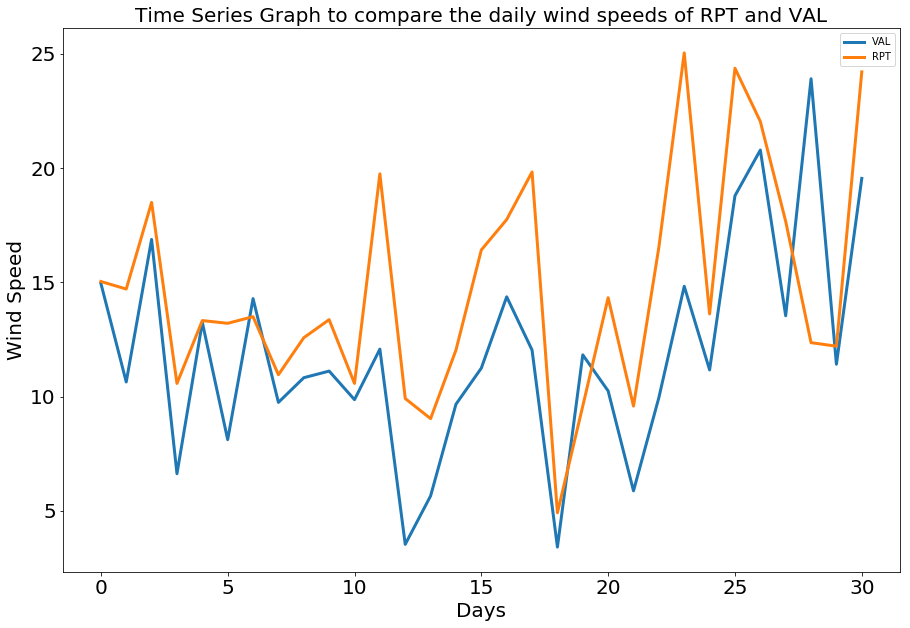

In [563]:
df_rpt.plot(figsize=(15,10), linewidth=3, fontsize=20)
plt.title('Time Series Graph to compare the daily wind speeds of RPT and VAL', fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Wind Speed', fontsize=20);




In [564]:
df_val = df.loc[df['Yr']== 61]
df_val

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.040000,14.960000,13.17,9.29,10.455834,9.87,13.67,10.250000,10.83,12.58,18.50,15.04
1,61,1,2,14.710000,10.644314,10.83,6.50,12.620000,7.67,11.50,10.040000,9.79,9.67,17.54,13.83
2,61,1,3,18.500000,16.880000,12.33,10.13,11.170000,6.17,11.25,8.495053,8.50,7.67,12.75,12.71
3,61,1,4,10.580000,6.630000,11.75,4.58,4.540000,2.88,8.63,1.790000,5.83,5.88,5.46,10.88
4,61,1,5,13.330000,13.250000,11.42,6.17,10.710000,8.21,11.92,6.540000,10.92,10.34,12.92,11.83
5,61,1,6,13.210000,8.120000,9.96,6.67,5.370000,4.50,10.67,4.420000,7.17,7.50,8.12,13.17
6,61,1,7,13.500000,14.290000,9.50,4.96,12.290000,8.33,9.17,9.290000,7.58,7.96,13.96,13.79
7,61,1,8,10.960000,9.750000,7.62,5.91,9.620000,7.29,14.29,7.620000,9.25,10.46,16.62,16.46
8,61,1,9,12.580000,10.830000,10.00,4.75,10.370000,6.79,8.04,10.130000,7.79,9.08,13.04,15.37
9,61,1,10,13.370000,11.120000,19.50,8.33,9.710000,6.54,11.42,7.790000,8.54,9.00,8.58,11.83


In [595]:
monthlyavg =[]
for i in range(1,13):
    monthlyavg.append(df.groupby('Mo')['RPT'].apply(pd.DataFrame).mean()[i])


In [596]:
monthlyavg

[14.842872736936771,
 13.71090551181103,
 13.155835079608305,
 12.555648148148146,
 11.724032258064517,
 10.454857383723553,
 9.992007168458782,
 10.217263417940359,
 11.458518518518515,
 12.660077038012039,
 13.200722222222224,
 14.446397849462365]

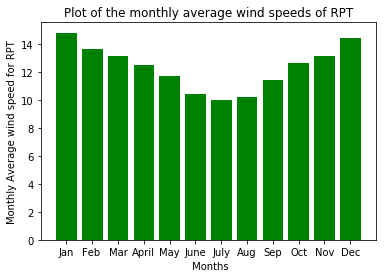

In [612]:
month = ['Jan','Feb ','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec']

#print(len(x_pos))
#print(len(monthlyavg))

plt.bar(month,monthlyavg, color='green')
plt.xlabel(" Months")
plt.ylabel("Monthly Average wind speed for RPT")
plt.title("Plot of the monthly average wind speeds of RPT")

plt.xticks(month, month)

plt.show()

## Statistical Significance
A manager wants to see if geographical region is associated with ownership of a Macintosh
computer. The manager surveys 100 people for the given data.

Check the statistical significance of this test.

<b>Analysis</b>:
    For checking statistical significance of this test we are using Chi-square test of independence. We are futher calculating P value for verifying.
    Consider null hypothesis and Alternative hypothysis as follows:
    
        H0: The two variables are independent
        H1: The two variables are not independent.
            
  For this test we are assuming alpha to be <b> 0.05</b> . Thus our confidence interval shall be <b>0.95</b>.

In [74]:
import scipy.stats as stats

d = {'Mac' : pd.Series([12,21,17,50], index=['North East','South West','Mid West','column_total']),
 'No Mac' : pd.Series([14, 18, 18,50], index=['North East','South West','Mid West','column_total']),
 'row_totals' : pd.Series([(12+14),(21+18),(17+18),(50+50)], index=['North East','South West','Mid West','column_total'])}

df = pd.DataFrame(d)
observed = df.iloc[0:3,0:2]

In [75]:
df

,Mac,No Mac,row_totals
North East,12,14,26
South West,21,18,39
Mid West,17,18,35
column_total,50,50,100


In [76]:
observed

,Mac,No Mac
North East,12,14
South West,21,18
Mid West,17,18


In [77]:
expected =  np.outer(df["row_totals"][0:3],
                 df.loc["column_total"][0:2])/100

expected = pd.DataFrame(expected)

expected

,0,1
0,13.0,13.0
1,19.5,19.5
2,17.5,17.5


Now we are calculating the chi-square value by using chi-sqr formula

In [78]:
expected.columns = ["Mac","No Mac"]
expected.index = ['North East','South West','Mid West']

chi_squar_calculated = (((observed-expected)**2)/expected).sum().sum()

print('\033[1m'+"Calculated chi-sqr is",chi_squar_calculated)

Calculated chi-sqr is 0.4131868131868132


Now get the critical chi sqr value for alpha 0.05

In [79]:
Chi_sqr_crit = stats.chi2.ppf(q = 0.95, df = 2)  

print('\033[1m'+"Critical value for alpha 0.05 is")
print(Chi_sqr_crit)

Critical value for alpha 0.05 is
5.991464547107979


Calculating p value statistic

In [80]:
p_value = 1 - stats.chi2.cdf(x=chi_squar_calculated,  df =2 ) # Find the p-value df=2)
print('\033[1m'+"P value is")
print(p_value)

P value is
0.8133502856292678


Now we are verifying our results by using library function which will give all static values for our significance test.

In [81]:
from scipy.stats import chi2_contingency
chi2, p, df, expected = chi2_contingency(observed)

In [83]:
print('\033[1m'+ "Chi sqrare calculated for observed contigency is\n ",chi2)
print('\033[1m'+"P value calculated for observed contigency is\n ",p)
print('\033[1m'+"Degree of freedom  for observed contigency is \n",df)
print('\033[1m'+"Expected value metrics observed contigency is \n",expected)



Chi sqrare calculated for observed contigency is
  0.4131868131868133
P value calculated for observed contigency is
  0.8133502856292677
Degree of freedom  for observed contigency is 
 2
Expected value metrics observed contigency is 
 [[13.  13. ]
 [19.5 19.5]
 [17.5 17.5]]


<b> Conclusion </b>:
    
    From above stats we can conclude that calculated chi square value is less than critical chi-sqr value so we do not reject the NULL hypothesis.
    
    Also P value is more that alpha value which is 0.05 thus we do not reject null hypothesis.

As Null hypothesis was that the two variables were independent and that hypothesis was accepted. 
The managerial conclusion is that ownership of a mac and geographical region are <b>NOT related </b>.




## References:

1. https://www.geeksforgeeks.org/
2. https://medium.com/
3. https://stackoverflow.com
4. https://www.w3schools.com/